In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from sympy.utilities.iterables import multiset_permutations
from numpy import diff
import sympy as sym
import math
import urllib.request

# Algebra lineal

In [ ]:
#Ejercicio 3

def multiplicacion(A,B):
  n=A.shape[1]
  n2=A.shape[0]
  n3=B.shape[1]
  n4=B.shape[0]
  Result=np.zeros((n2,n3))
  if n == n4:
    for i in range(n2):
      for j in range(n3):
        Result[i,j]= np.sum(A[i,:]*B[:,j])
    return Result
  else:
    return 0

A=np.array([[1,0,0],[5,1,0],[-2,3,1]])
B=np.array([[4,-2,1],[0,3,7],[0,0,2]])

R=multiplicacion(A,B)
R


array([[ 4., -2.,  1.],
       [20., -7., 12.],
       [-8., 13., 21.]])

In [ ]:
#Ejercicio 7

def descomposicion(R):
  n=len(R[0,:])
  L=np.zeros((n,n))
  U=np.zeros((n,n))
  U[0,:]=R[0,:]
  for i in range(n):
    L[i,i]=1
  L[1,0]=R[1,0]/U[0,0]
  U[1,1]=R[1,1]-(U[0,1]*L[1,0])
  U[1,2]=R[1,2]-(L[1,0]*U[0,2])
  L[2,0]=R[2,0]/U[0,0]
  L[2,1]=(R[2,1]-(U[0,1]*L[2,0]))/U[1,1]
  U[2,2]=R[2,2]-(U[0,2]*L[2,0])-(U[1,2]*L[2,1])
  return L,U
descomposicion(R)





(array([[ 1.,  0.,  0.],
        [ 5.,  1.,  0.],
        [-2.,  3.,  1.]]),
 array([[ 4., -2.,  1.],
        [ 0.,  3.,  7.],
        [ 0.,  0.,  2.]]))

In [ ]:
#Ejercicio 8
A=np.array([[3,-1,-1],[-1,3,1],[2,1,4]])
b=np.array([1,3,7])

L,U= descomposicion(A)

def sustitucion_adelante(L,b):
  n=L.shape[1]
  sol=np.zeros((n))
  sum=0
  for i in range(n):
    for j in range(n-1):
      sum+=L[i,j]*sol[j]
    sol[i]=b[i]-sum
    sum=0
  return sol
s=sustitucion_adelante(L,b)
np.dot(L,s)

#def sustitucion_atras():




array([1., 3., 7.])

In [ ]:
#Ejercicio 10
import numpy as np
A = np.array([[1.,2.,-1.],[1.,0.,1.],[4.,-4.,5.]])

eigenvectors = np.zeros((3, 3))

p = np.poly(A)

roots = np.roots(p)

eigenvectors=[]

for i in range(len(roots)):
    B = A - roots[i] * np.identity(3)
    v0 = np.zeros(3)
    v0[i] = 1.
    v1 = np.dot(B,v0)
    v1 = v1/np.linalg.norm(v1)
    eigenvectors.append(v1)
    
print(roots[2])
print(eigenvectors[1])

0.9999999999999987
[ 0.40824829 -0.40824829 -0.81649658]


In [ ]:
#ejercicio 9
_A=np.array([[4,1,1],[1,3,2],[1,2,5]])
def matriz_rotacion(angie,i,j,n):
  matrix=np.identity(n)
  matrix[i,i]=np.cos(angie)
  matrix[j,j]=np.cos(angie)
  matrix[i,j]=np.sin(angie)
  matrix[j,i]=-np.sin(angie)
  return matrix

def maximum(_n):
  maximo=0
  maxub=np.zeros((2))
  for i in range(np.shape(_n)[0]):
    for j in range(np.shape(_n)[0]):
      if _n[i,j] > maximo:
        maximo=_n[i,j]
        maxub[0], maxub[1]= i , j 
  return maxub

def valores_vectores_propios(_A, it_max=5):
  
  A=_A
  maximoss=0
  maxub=np.zeros((2))
  n=3
  rotacion=0
  diagonal=np.zeros((n,n))
  nueva=np.random.random((n,n))
  Angulo=0
  it=0
  vectores=np.identity(n)
  while nueva.any() != 0 :
    for i in range(n):
      diagonal[i,i]=A[i,i]
      nueva=A-diagonal
    maximoss=maximum(nueva)
    pi=int(maximoss[0])
    pj=int(maximoss[1])
    if A[pi,pi] - A[pj,pj] == 0:
      rotacion=matriz_rotacion(np.pi/4,pi,pj,n)
    else:
      Angulo=np.arctan((2*A[pi,pj])/(A[pi,pi]-A[pj,pj]))/2
      rotacion=matriz_rotacion(Angulo,pi,pj,n)
    
    vectores=vectores @ rotacion.T  
    A= rotacion @ A @ rotacion.T
    Angulo=0
    it+=1
    
  
    if it == it_max:
      nueva=np.zeros((n,n))

  valores=np.array([A[2,2], A[0,0], A[1,1]])
  vectores2=np.zeros((n,n))
  vectores2[:,0], vectores2[:,1], vectores2[:,2]=vectores[:,2], vectores[:,0], -vectores[:,1]
  
  return valores, vectores2


valores_vectores_propios(_A), np.linalg.eig(_A)

((array([6.89510652, 3.39729482, 1.70759867]),
  array([[ 0.43170398,  0.8856695 ,  0.17094212],
         [ 0.49725438, -0.07555865, -0.86430837],
         [ 0.75257541, -0.45812708,  0.47302201]])),
 (array([6.89510652, 3.39729507, 1.70759841]),
  array([[ 0.43170413,  0.88573564,  0.17059871],
         [ 0.49725362, -0.07589338, -0.86427949],
         [ 0.75257583, -0.45794385,  0.47319874]])))

In [ ]:
#ejercicio 12
def f1(x,y,z):
  return (6*x)-(2*np.cos(y*z))-1
def f2(x,y,z):
  return 9*y + (x**2+np.sin(z)+1.06)**(1/2)+0.9
def f3(x,y,z):
  return 60*z+3*np.exp(-x*y)+10*np.pi-3

def dx(f,x,y,z,h):
    d=0
    if h != 0:
      d=(f((x+h),y,z)-f((x-h),y,z))/(2*h)
    return d 
def dy(f,x,y,z,h):
    d=0
    if h != 0:
      d=(f(x,(y+h),z)-f(x,(y-h),z))/(2*h)
    return d 
def dz(f,x,y,z,h):
    d=0
    if h != 0:
      d=(f(x,y,(z+h))-f(x,y,(z-h)))/(2*h)
    return d 
def Gradient_xyz(f, x, y, z, h): 
    grad = np.array([0., 0., 0.])
    gradx=dx(f,x,y,z,h)
    grady=dy(f,x,y,z,h)
    gradz=dz(f,x,y,z,h)
    grad[0]=gradx
    grad[1]=grady
    grad[2]=gradz
    return grad

def jacobiano2(v,f1,f2,f3,h):
  M=[]
  M.append(Gradient_xyz(f1,v[0],v[1],v[2],h))
  M.append(Gradient_xyz(f2,v[0],v[1],v[2],h))
  M.append(Gradient_xyz(f3,v[0],v[1],v[2],h))
  return np.linalg.det(M)

def dx4(f,x,y,z,h):
    d=0
    if h != 0:
      d=(f((x-2*h),y,z)-8*f((x-h),y,z)+8*f((x+h),y,z)-f((x+2*h),y,z))/(12*h)
    return d 
def dy4(f,x,y,z,h):
    d=0
    if h != 0:
      d=(f(x,(y-2*h),z)-8*f(x,(y-h),z)+8*f(x,(y+h),z)-f(x,(y+2*h),z))/(12*h)
    return d 
def dz4(f,x,y,z,h):
    d=0
    if h != 0:
      d=(f(x,y,(z-2*h))-8*f(x,y,(z-h))+8*f(x,y,(z+h))-f(x,y,(z+2*h)))/(12*h)
    return d 
def Gradient_xyz4(f, x, y, z, h): 
    grad = np.array([0., 0., 0.])
    gradx=dx4(f,x,y,z,h)
    grady=dy4(f,x,y,z,h)
    gradz=dz4(f,x,y,z,h)
    grad[0]=gradx
    grad[1]=grady
    grad[2]=gradz
    return grad

def jacobiano4(v,f1,f2,f3,h):
  M=[]
  M.append(Gradient_xyz4(f1,v[0],v[1],v[2],h))
  M.append(Gradient_xyz4(f2,v[0],v[1],v[2],h))
  M.append(Gradient_xyz4(f3,v[0],v[1],v[2],h))
  return np.linalg.det(M)




print("h2:")
print(jacobiano2([0.5,0.5,0.5],f1,f2,f3,0.01))
print("h4:")
print(jacobiano4([0.5,0.5,0.5],f1,f2,f3,0.01))
print("Para que h2 esté muy cercano a h4, se necesita que el h de h4 sea en 0.1")

h2:
3239.1492018183885
h4:
3239.1490485161194
Para que h2 esté muy cercano a h4, se necesita que el h de h4 sea en 0.1


In [ ]:
#Ejercicio 13
j1=np.array([[0,0,0],[0,0,-1],[0,1,0]])
j2=np.array([[0,0,1],[0,0,0],[-1,0,0]])
j3=np.array([[0,-1,0],[1,0,0],[0,0,0]])


matrices=np.array([j1,j2,j3])
a = np.array([0,1,2])
y=np.array([[0,0,0]])
E=0
p1=np.array([0,1,2])
p2=np.array([1,2,0])
p3=np.array([2,0,1])
for p in multiset_permutations(a):
  y=np.append(y,[p],axis=0)
for i in range(1,7):
  l=np.array(y[i])
  if np.array_equal(l,p1) or np.array_equal(l,p2) or np.array_equal(l,p3) :
    E=1
  else:
    E=-1
  print((matrices[l[0]] @ matrices[l[1]] - matrices[l[1]]@ matrices[l[0]] == E*matrices[l[2]]).all())



True
True
True
True
True
True


In [ ]:
#Ejercicio 14
j1=np.array([[0,1],[1,0]])
j2=np.array([[0,-1j],[1j,0]])
j3=np.array([[1,0],[0,-1]])


matrices=np.array([j1,j2,j3])
a = np.array([0,1,2])
y=np.array([[0,0,0]])
E=0
p1=np.array([0,1,2])
p2=np.array([1,2,0])
p3=np.array([2,0,1])
for p in multiset_permutations(a):
  y=np.append(y,[p],axis=0)
for i in range(1,7):
  l=np.array(y[i])
  if np.array_equal(l,p1) or np.array_equal(l,p2) or np.array_equal(l,p3) :
    E=1
  else:
    E=-1
  print((matrices[l[0]] @ matrices[l[1]] - matrices[l[1]]@ matrices[l[0]] == 2j*E*matrices[l[2]]).all())

True
True
True
True
True
True


In [ ]:
#Ejercicio 15
j00=np.array([[1,0,0,0],[0,1,0,0],[0,0,-1,0],[0,0,0,-1]])
j11=np.array([[0,0,0,1],[0,0,1,0],[0,-1,0,0],[-1,0,0,0]])
j22=np.array([[0,0,0,-1j],[0,0,1j,0],[0,1j,0,0],[-1j,0,0,0]])
j33=np.array([[0,0,1,0],[0,0,0,-1],[-1,0,0,0],[0,1,0,0]])
nn=np.array([[1,0,0,0],[0,-1,0,0],[0,0,-1,0],[0,0,0,-1]])
matrices=np.array([j00,j11,j22,j33])
a = np.array([0,1,2,3])
y=np.array([[0,0,0,0]])

for p in multiset_permutations(a):
  y=np.append(y,[p],axis=0)
  
for i in range(1,25):
  l=np.array(y[i])

  print((matrices[l[0]] @ matrices[l[1]] + matrices[l[1]]@ matrices[l[0]] == 2*nn[l[0],l[1]] * np.identity(4)).all())

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


# Minimos cuadrados



[1.42857143 0.42857143]


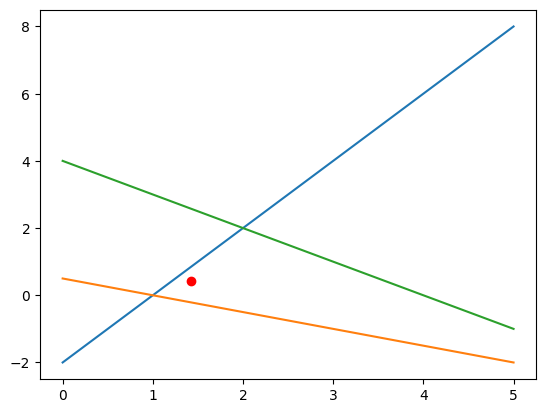

In [ ]:
#Ejercicio 1
#a)
P=np.array([[2,-1],[1,2],[1,1]])
y=np.array([2,1,4])
v=np.linalg.inv(P.T @ P) @ P.T @ y
print(v)
tm=np.linspace(0,5,100)
def r1(tm):
  return 2*tm-2
def r2(tm):
  return (1-tm)/2
def r3(tm):
  return 4-tm

plt.plot(tm,r1(tm))
plt.plot(tm,r2(tm))
plt.plot(tm,r3(tm))
plt.scatter(v[0],v[1], color="r")

# El punto calculado es el que mejor cumple con el sistema de ecuaciones. Es la proyeccion del vector solucion sobre el espacio columna refinido por los vectores columna de la matriz P.

[1.46464646 0.45454545]


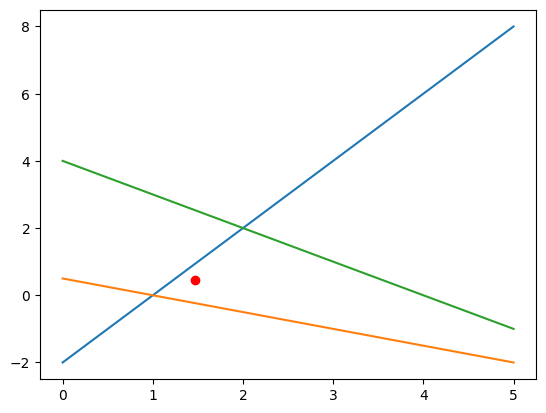

In [ ]:
#Ejercicio 1
#b)
pry=np.linspace(-5,5,100)
v_2=np.zeros([2])
y=np.array([2,1,4])
resul=np.array([[0,0,0]])
normas=100
ubp=np.zeros((2))
normas2=np.zeros((10000))
for i in range(len(pry)):
  for j in range(len(pry)):
    v_2[0]=pry[i]
    v_2[1]=pry[j]
    z1= P @ v_2 - y 
    if np.linalg.norm(z1) < normas:
      normas=np.linalg.norm(z1)
      ubp[0]=pry[i]
      ubp[1]=pry[j]

    resul=np.append(resul,[z], axis=0)

for i in range(10000):
  normas2[i]=np.linalg.norm(resul[i])

print(ubp)

plt.plot(tm,r1(tm))
plt.plot(tm,r2(tm))
plt.plot(tm,r3(tm))
plt.scatter(ubp[0],ubp[1], color="r")

plt.show()


# El punto está bastante cerca al calculado con el metodo anterior, sin embargo como no podemos muestrar puntos infinitos los valores difieren.

sin error para [1,1,1] (Dado en d)
[-110.01069727  103.89842074   -5.93182878]
con error
-110.0106972728062 103.90111918798551 -5.9317654127667145
Los resultados varian levemente, el mejor modelo es el primero
[4.40296875 0.97576351 2.78679217]


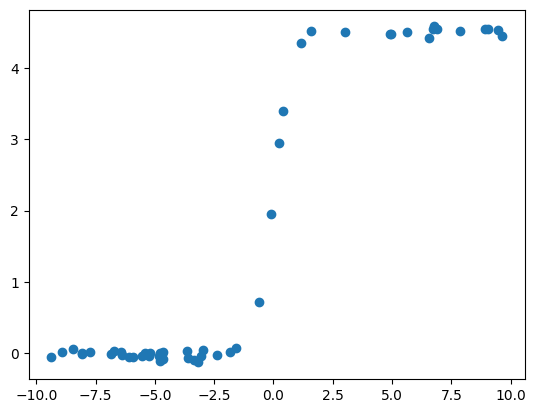

In [ ]:
#Ejercicio 7
urllib.request.urlretrieve('https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Sigmoid.csv', 'Sigmoid.csv')

data = np.loadtxt('Sigmoid.csv',dtype=str,skiprows=1)
data1 = []
X = []
Y = []
for i in range(len(data)):
    lista = data[i].split(",")
    lista1 = [ float(x) for x in lista ]
    data1.append(lista1)
    
for i in data1:
    X.append(i[0])
    Y.append(i[1])
x = np.array(X)
y = np.array(Y)

#a
def M(x,teta):
    a = teta[0]/(teta[1]+np.exp(-1*teta[2]*x))
    return a
#b
def func_costo(teta):
    a = 0
    for i in range(len(x)):
        a += (y[i]-M(x[i],teta))**2
    return a
#c
def DP_Noerr(t,h = 0.01):
    DParcial = np.zeros(3)
    
    DParcial[0] = (func_costo([t[0]+h,t[1],t[2]]) - func_costo([t[0]-h,t[1],t[2]])) / (2*h)
    DParcial[1] = (func_costo([t[0],t[1]+h,t[2]]) - func_costo([t[0],t[1]-h,t[2]])) / (2*h)
    DParcial[2] = (func_costo([t[0],t[1],t[2]+h]) - func_costo([t[0],t[1],t[2]-h])) / (2*h)
    return DParcial
print("sin error para [1,1,1] (Dado en d)" )
print(DP_Noerr([1,1,1]))


#d
def DP_Err(l,t, h):
    t1 = t.copy()
    t2 = t.copy()
            
    t1[l] = t1[l]+h
    t2[l] = t2[l]-h
    
    sum = 0
    for i in range(len(y)):
        f = y[i]-M(x[i],t)
        dp = (M(x[i],t1) - M(x[i],t2))/(2*h)
        sum+= f*dp
    
    t=(-2)*sum

    return t
print("con error" )
print(DP_Err(0,[1,1,1],0.01),DP_Err(1,[1,1,1],0.01),DP_Err(2,[1,1,1],0.01))

print("Los resultados varian levemente, el mejor modelo es el primero")

#e

def Descenso(l,t,max,Error): 
    e0 = 1
    it_min = 0
    for i in range(max):
        if e0 > Error:
            f1 = DP_Noerr(t)
            t = t-l*f1
    return t
a = Descenso(1/1000,[1,1,1],10000,0.01)
print(a)

#f
x_ = np.linspace(min(x),max(x))

plt.scatter(x,y)
